#🛠 Step 1: Load the Dataset


In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv('imdb.csv')

# Peek at data
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


#🧼 Step 2: Basic Cleaning

In [5]:
# Check null values
df.isnull().sum()

# Drop rows with many nulls or fill them appropriately
df = df.dropna(subset=['Title', 'Year', 'Genre', 'Rating'])

# Convert year to integer
df['Year'] = df['Year'].astype(int)

# Clean genres (if needed)
df['Genre'] = df['Genre'].str.split(',').str[0]  # Take primary genre


#📊 Step 3: Exploratory Data Analysis (EDA)

#🔟 Top 10 Movies by IMDb Rating

In [7]:
top10 = df.sort_values(by='Rating', ascending=False).head(10)
top10[['Title', 'Rating', 'Year']]


,Title,Rating,Year
54,The Dark Knight,9.0,2008
80,Inception,8.8,2010
117,Dangal,8.8,2016
36,Interstellar,8.6,2014
249,The Intouchables,8.6,2011
96,Kimi no na wa,8.6,2016
64,The Prestige,8.5,2006
99,The Departed,8.5,2006
476,The Lives of Others,8.5,2006
124,The Dark Knight Rises,8.5,2012


#📈 Number of Movies Released per Year

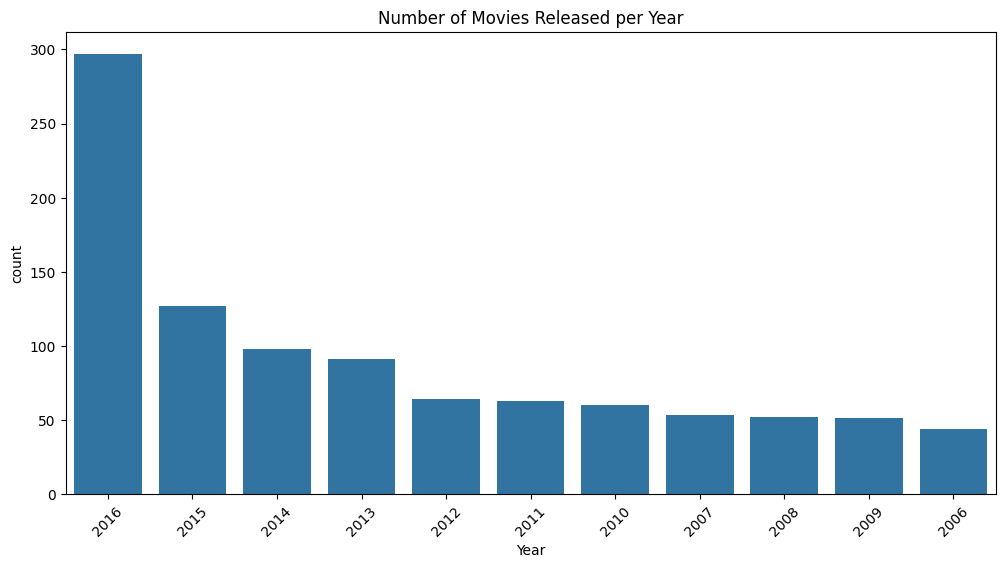

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', order=df['Year'].value_counts().index[:20])
plt.xticks(rotation=45)
plt.title('Number of Movies Released per Year')
plt.show()


#🎭 Most Common Genres

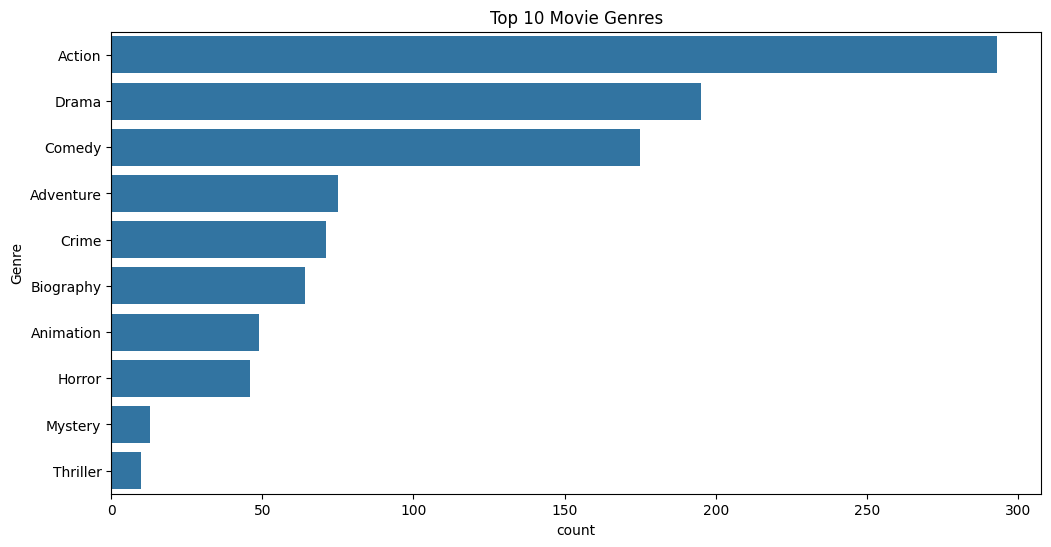

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index[:10])
plt.title('Top 10 Movie Genres')
plt.show()


#📉 Ratings Distribution

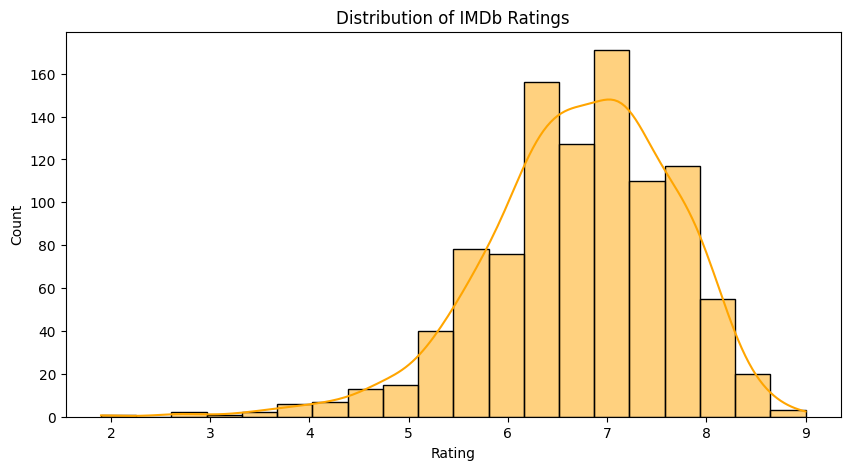

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.show()


#🧑‍🤝‍🧑 Step 4: Top Directors & Actors

#🎬 Most Frequent Directors

In [14]:
df['Director'].value_counts().head(10)


,count
Director,
Ridley Scott,8
David Yates,6
Paul W.S. Anderson,6
Michael Bay,6
M. Night Shyamalan,6
Christopher Nolan,5
Peter Berg,5
Justin Lin,5
J.J. Abrams,5


#🌟 Most Mentioned Stars

In [17]:
from collections import Counter

# Split multiple stars and count
star_list = df['Actors'].dropna().str.split(', ')
flat_stars = [star for sublist in star_list for star in sublist]
pd.Series(Counter(flat_stars)).sort_values(ascending=False).head(10)


,0
Mark Wahlberg,15
Christian Bale,13
Brad Pitt,13
Hugh Jackman,13
Michael Fassbender,12
Tom Hardy,12
Channing Tatum,11
Robert Downey Jr.,11
Johnny Depp,11
Jake Gyllenhaal,11


#Additional Analysis

#🌟IMDb Rating Distribution by Genre (Top 6 Genres)

<ipython-input-20-9bbbf7a6c540>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Genre'].isin(top_genres)], x='Genre', y='Rating', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


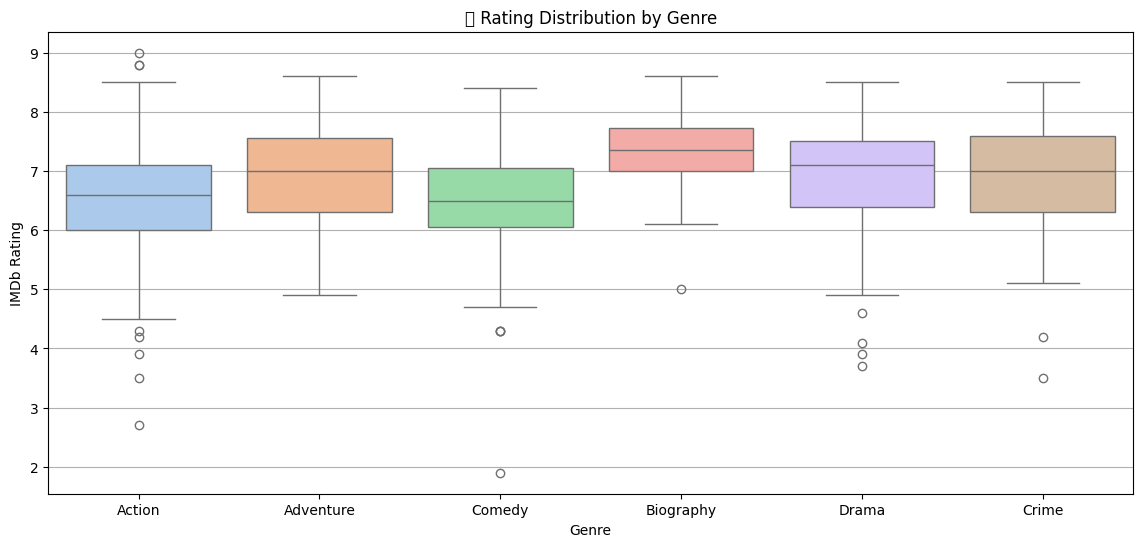

In [20]:
top_genres = df['Genre'].value_counts().head(6).index
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['Genre'].isin(top_genres)], x='Genre', y='Rating', palette='pastel')
plt.title('🎬 Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.grid(axis='y')
plt.show()



#⏰ 16. Duration Distribution — How Long Are These Movies?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


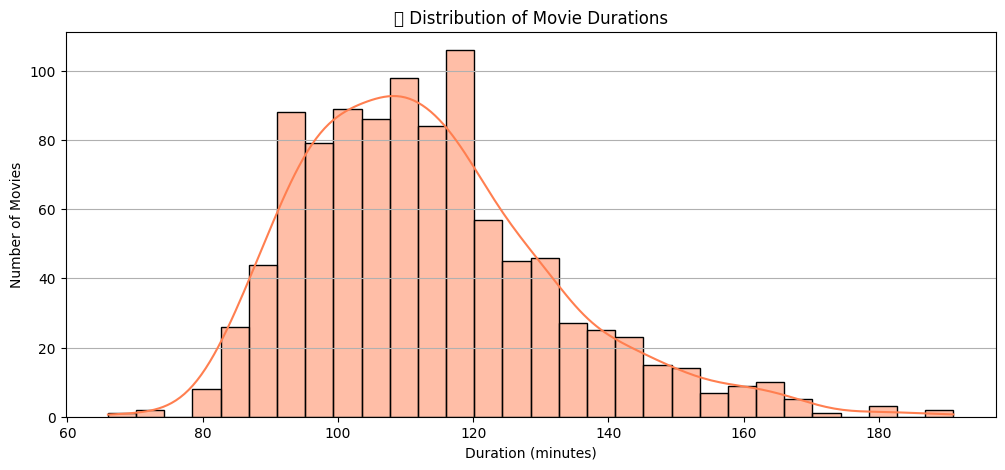

In [23]:
if 'Runtime (Minutes)' in df.columns:
    plt.figure(figsize=(12,5))
    sns.histplot(df['Runtime (Minutes)'].dropna(), bins=30, kde=True, color='coral')
    plt.title('🕒 Distribution of Movie Durations')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Number of Movies')
    plt.grid(axis='y')
    plt.show()


#🌟WordCloud of Movie Titles

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


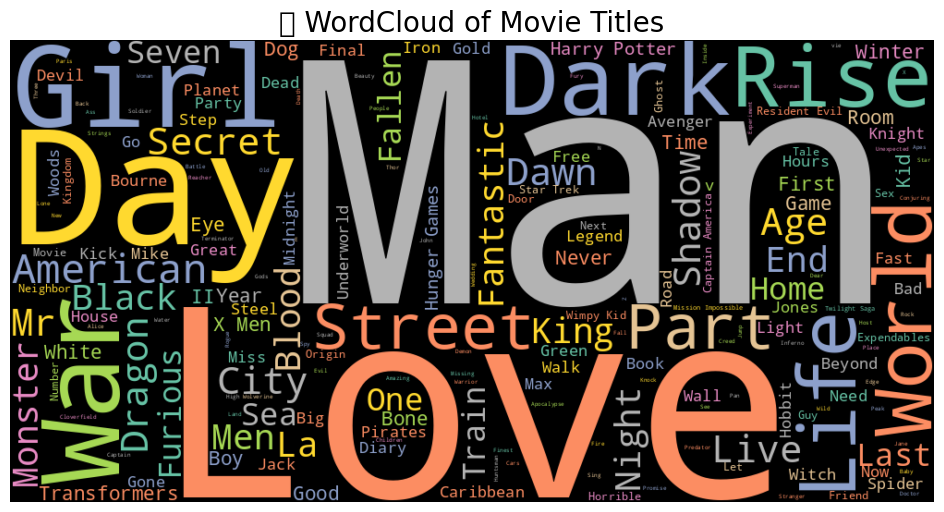

In [24]:
from wordcloud import WordCloud

title_text = ' '.join(df['Title'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set2').generate(title_text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🌟 WordCloud of Movie Titles', fontsize=20)
plt.show()


#🌟Top 10 Highest-Rated Movies

<ipython-input-25-79463d19642a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='Rating', y='Title', palette='mako')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


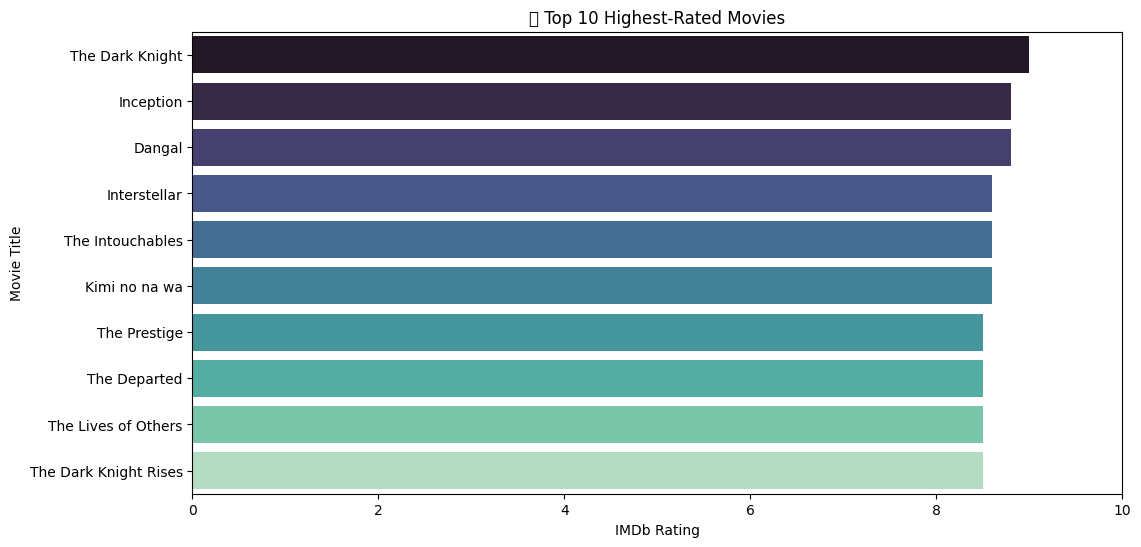

In [25]:
# If 'votes' column is available
if 'Votes' in df.columns:
    top_movies = df[df['Votes'] > 50].sort_values(by='Rating', ascending=False).head(10)
else:
    top_movies = df.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_movies, x='Rating', y='Title', palette='mako')
plt.title('🎬 Top 10 Highest-Rated Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.xlim(0, 10)
plt.show()


#🧑‍🤝‍🧑Actor Showdown - Leonardo DiCaprio Vs Tom Hanks

<ipython-input-26-76f6fbb49ec0>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actor1_movies['Rating'], label=actor1, shade=True)
<ipython-input-26-76f6fbb49ec0>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(actor2_movies['Rating'], label=actor2, shade=True)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


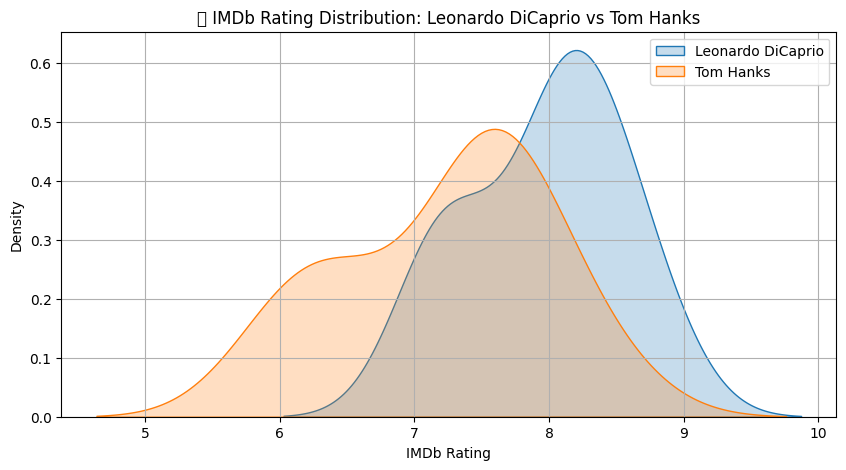

In [26]:
actor1 = "Leonardo DiCaprio"
actor2 = "Tom Hanks"

actor1_movies = df[df['Actors'].str.contains(actor1, na=False)]
actor2_movies = df[df['Actors'].str.contains(actor2, na=False)]

plt.figure(figsize=(10,5))
sns.kdeplot(actor1_movies['Rating'], label=actor1, shade=True)
sns.kdeplot(actor2_movies['Rating'], label=actor2, shade=True)
plt.title(f'🎥 IMDb Rating Distribution: {actor1} vs {actor2}')
plt.xlabel('IMDb Rating')
plt.legend()
plt.grid(True)
plt.show()


#🎖️Top Actors by Average Movie Rating (Min 3 Movies)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


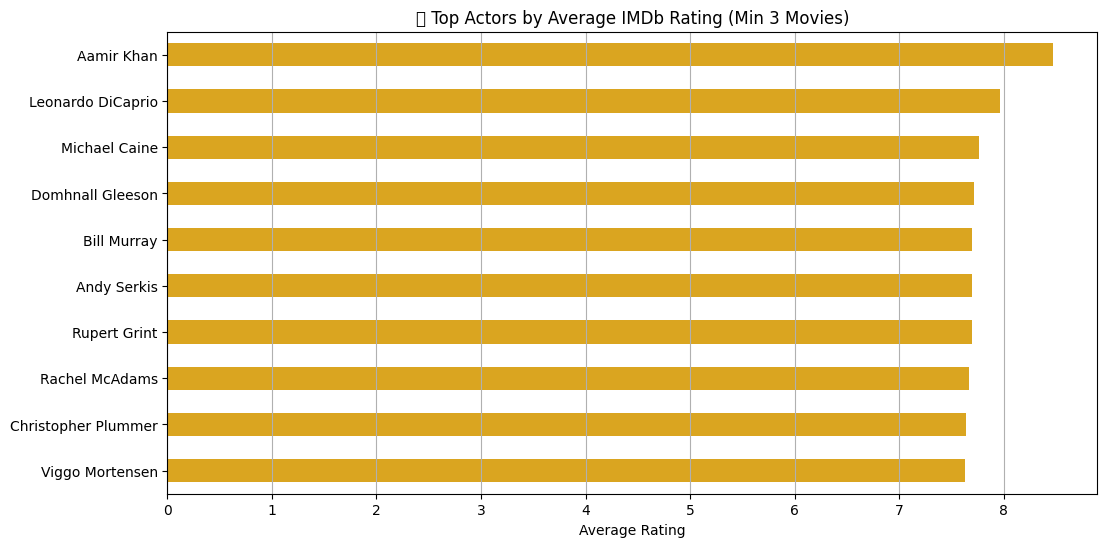

In [30]:
from collections import Counter

# Step 1: Flatten actor list from the 'stars' column
actor_series = df['Actors'].dropna().str.split(', ')
flat_actor_list = [actor for sublist in actor_series for actor in sublist]

# Step 2: Calculate average rating for each actor (min 3 movies)
actor_ratings = {}

for actor in flat_actor_list:
    actor_movies = df[df['Actors'].str.contains(actor, na=False)]
    if len(actor_movies) >= 3:
        actor_ratings[actor] = actor_movies['Rating'].mean()

# Step 3: Create and plot top 10 actors
top_actors_rating = pd.Series(actor_ratings).sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_actors_rating.plot(kind='barh', color='goldenrod')
plt.title('🎭 Top Actors by Average IMDb Rating (Min 3 Movies)')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()
